## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_excel("vm_dataset.xlsx")
# ilk 5, orta 5, son 5 satır
dataset.head()

,KOD,BARKOD,MAMUL,K.İÇİ,GR,LİSTE,FATURA ALTI %,DÖNEM SONU %,KDV,NET MALİYET,Ö.RAF,KATEGORİ,AY
0,67293883,8690637840746,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART
1,67293891,8690637840821,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART
2,67767533,8690637905896,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART
3,67754288,8690637905193,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART
4,68612788,8690637999277,1,8,335.0,39.75,10.0,5,0.01,34.326113,42.907641,FOOD,MART


In [3]:
selected_columns = ['KATEGORİ', 'AY', 'MAMUL', 'K.İÇİ', 'GR', 'LİSTE', 'NET MALİYET']
data_selected = dataset[selected_columns]
data_selected.head()

,KATEGORİ,AY,MAMUL,K.İÇİ,GR,LİSTE,NET MALİYET
0,FOOD,MART,1,8,400.0,21.85,18.449266
1,FOOD,MART,1,8,400.0,21.85,18.449266
2,FOOD,MART,1,12,600.0,27.00,22.538655
3,FOOD,MART,1,12,600.0,27.00,22.538655
4,FOOD,MART,1,8,335.0,39.75,34.326113


In [4]:
categorical_columns = ['KATEGORİ', 'AY', 'MAMUL']
numeric_columns = ['K.İÇİ', 'GR', 'LİSTE']

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Sayısal ve kategorik sütunları işlemek için bir sütun dönüştürücü oluşturun
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['K.İÇİ', 'GR', 'LİSTE']),
                                ('cat', OneHotEncoder(),
                                 ['KATEGORİ', 'AY', 'MAMUL'])])

In [6]:
from sklearn.linear_model import LinearRegression

# Modeli oluşturun
model = Pipeline(
    steps=[('preprocessor', preprocessor),
            ('regressor', LinearRegression())])



In [7]:
X = data_selected.drop('NET MALİYET', axis=1)
y = data_selected['NET MALİYET']


In [8]:
from sklearn.model_selection import train_test_split

# Verileri eğitim ve test kümelerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Modeli eğitin
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['K.İÇİ', 'GR', 'LİSTE']),
                                                 ('cat', OneHotEncoder(),
                                                  ['KATEGORİ', 'AY',
                                                   'MAMUL'])])),
                ('regressor', LinearRegression())])

In [10]:
# Modelin performansını test edin
print('Training R^2 score: %.3f' % model.score(X_train, y_train))
print('Test R^2 score: %.3f' % model.score(X_test, y_test))

Training R^2 score: 0.952
Test R^2 score: 0.961


#### Tahminlerde bulunmak için girdi 

In [11]:
new_data = pd.DataFrame({'KATEGORİ': ['PC'], 'AY': ['MAYIS'], 'MAMUL': [3],
                         'K.İÇİ': [104], 'GR': [2333], 'LİSTE': [400.0]})
prediction = model.predict(new_data)
print(f"Tahmin Edilen Net Maliyet: {prediction[0]}")

Tahmin Edilen Net Maliyet: 326.223363118913


In [12]:
# Modelin test veri seti üzerinde tahmin yapması
y_pred = model.predict(X_test)

# Modelin yaptığı tahminleri içeren değişken
tahminler_sutunu = y_pred.reshape(len(y_pred), 1)

# Gerçek değerleri içeren değişken
gercek_sutunu = y_test.values.reshape(len(y_test), 1)

# Tahminler ve gerçek değerleri birleştirerek karşılaştırma veri setini oluştur
comparison_dataset = pd.DataFrame(
    np.concatenate((tahminler_sutunu, gercek_sutunu), 1),
    columns=['Tahmin', 'Gerçek'])
comparison_dataset.head(10)


,Tahmin,Gerçek
0,91.263038,94.398931
1,59.575971,56.136070
2,20.764701,31.365675
3,35.350771,24.404345
4,145.985788,157.223419
5,40.973745,34.932037
6,37.303345,40.403880
7,44.226095,52.210421
8,101.946784,103.443311
9,49.757449,52.525977


In [14]:
# Tahmin ve gerçek değerli veri setini excel dosyası olarak kaydet
# comparison_dataset.to_excel('comparison_dataset.xlsx', index=False)

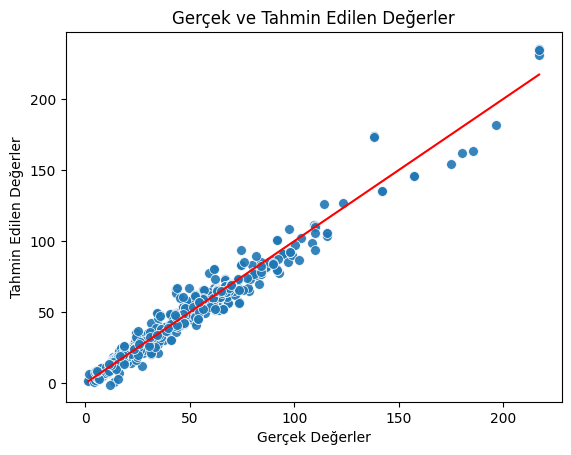

In [15]:
# visualize
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9, s=50)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.show()